<a href="https://colab.research.google.com/github/RendiZein/Metode-Rekayasa-Komputasi/blob/main/Adam_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import timedelta

# Nomor 11 (Adam Bashworth (metode Adam eksplisit) order 5 )


## Bagian A

In [99]:
#defined variable
def adam_bashworth_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
    start_time = time.monotonic()
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/dt)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y=np.zeros(len(t))
    e = np.zeros(len(t))
    y[0]=5
    y_t[0]=5
    e[0]=(np.abs(y[0]-y_t[0])/y_t[0])*100
    #looping
    for j in range(len(t)-1):
        # calculate y true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_pred
        ## j+1=1
        if j+1==1:
          y[j+1]=y[j]+f(t[j], y[j])*dt

        ## j+1=2
        elif j+1==2:
          y[j+1]=y[j]+(3/2*f(t[j], y[j])-1/2*f(t[j-1], y[j-1]))*dt

        ## j+1=3
        elif j+1==3:
          y[j+1]=y[j]+(23/12*f(t[j], y[j])-16/12*f(t[j-1], y[j-1])\
                       +5/12*f(t[j-2], y[j-2]))*dt

        ## j+1=4
        elif j+1==4:
          y[j+1]=y[j]+(55/24*f(t[j], y[j])-59/24*f(t[j-1], y[j-1])\
                       +37/24*f(t[j-2], y[j-2])-9/24*f(t[j-3], y[j-3]))*dt

        ## j+1>= 5
        else:
          y[j+1]=y[j]+(191/72*f(t[j], y[j])-281/72*f(t[j-1], y[j-1])\
                       +267/72*f(t[j-2], y[j-2])-131/72*f(t[j-3], y[j-3])+\
                       26/72*f(t[j-4], y[j-4]))*dt



        #calculate error
        e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
    end_time = time.monotonic()
    delta_time=timedelta(seconds=end_time - start_time)

    if pr == 1:
      return t, y_t, y, e, delta_time
    else:
      df = pd.DataFrame(list(zip(t, y, y_t, e)),
              columns =['t','y pred', 'y true', 'error(%)'])
      display(df)
      plt.plot(t, y, '0.8', label='Euler Method')
      plt.plot(t, y_t, 'k', label='Analytical')
      plt.title('Comparison For Euler Method and Analytical')
      plt.xlabel('t')
      plt.ylabel('f(t)')
      plt.grid()
      plt.legend(loc='lower right')
      plt.show()
      print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


,t,y pred,y true,error(%)
0,0.00,5.000000,5.000000,0.000000
1,0.02,4.940000,4.940596,0.012064
2,0.04,4.881800,4.882368,0.011640
3,0.06,4.824731,4.825294,0.011659
4,0.08,4.768803,4.769349,0.011456
5,0.10,4.713971,4.714512,0.011472
6,0.12,4.660232,4.660761,0.011360
7,0.14,4.607555,4.608075,0.011272
8,0.16,4.555922,4.556431,0.011169
9,0.18,4.505312,4.505811,0.011072


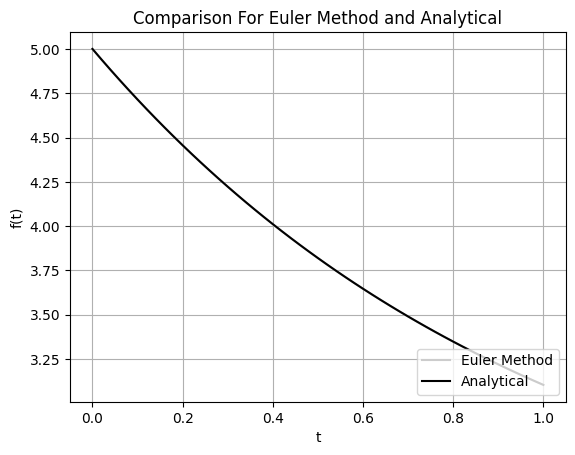

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.000759


In [100]:
adam_bashworth_ordinary_differential_equations_single_order_1(dt=0.02, pr=2)

## Bagian B

### Metode Euler

In [101]:
#defined variable
def euler_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
    start_time = time.monotonic()
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/dt)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y=np.zeros(len(t))
    e = np.zeros(len(t))
    y[0]=5
    y_t[0]=5
    e[0]=(np.abs(y[0]-y_t[0])/y_t[0])*100
    #looping
    for j in range(len(t)-1):
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_pred
        y[j+1]=y[j]+f(t[j], y[j])*dt
        #calculate error
        e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
    end_time = time.monotonic()
    delta_time=timedelta(seconds=end_time - start_time)
    if pr==1:
      return t, y_t, y, e, delta_time
    else :
      df = pd.DataFrame(list(zip(t, y, y_t, e)),
                  columns =['t','y pred', 'y true', 'error(%)'])
      display(df)
      plt.plot(t, y, '0.8', label='Euler Method')
      plt.plot(t, y_t, 'k', label='Analytical')
      plt.title('Comparison For Euler Method and Analytical')
      plt.xlabel('t')
      plt.ylabel('f(t)')
      plt.grid()
      plt.legend(loc='lower right')
      plt.show()
      print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


### Metode Modified Euler

In [102]:
#defined variable
def modified_euler_ordinary_differential_equations_single_order_1(dt=0.1, eps=1.0, pr=2):
    start_time = time.monotonic()
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/dt)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y=np.zeros(len(t))
    e = np.zeros(len(t))
    ep = np.zeros(len(t))
    k = np.zeros(len(t))
    yp=np.zeros(len(t))
    dif=np.zeros(len(t))
    dif_p=np.zeros(len(t))
    y[0]=5
    y_t[0]=5
    k[0]=0

    #looping
    for j in range(len(t)-1):
        #calculate y_true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_k
        yp[j+1]=y[j]+f(t[j], y[j])*dt
        ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100
        yk = [y[j]+(f(t[j], y[j])+f(t[j+1], yp[j+1]))*dt*0.5] # inisiasi y korektor
        e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100 # inisiasi error untuk y kor pertama
        dif[j+1]=np.abs(yk[-1]-yp[j+1])
        while dif[j+1]>eps:
          yk.append(y[j]+(f(t[j], y[j])+f(t[j+1], yk[-1]))*dt*0.5)
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100
          dif[j+1]=np.abs(yk[-1]-yk[-2])

        k[j+1]=len(yk)
        y[j+1]=yk[-1]
        ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100

        #calculate error
        # e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100

    end_time = time.monotonic()
    delta_time=timedelta(seconds=end_time - start_time)
    if pr==1:
      return t, y_t, y, e, ep, delta_time
    else:
      df = pd.DataFrame(list(zip(t, y,yp, y_t, dif, e,ep, k)),
                    columns =['t','y','y_pred', 'y true','dif', 'error(%)','error_p(%)', 'n_kor'])
      display(df)
      plt.plot(t, y, '0.7', label='Euler Method')
      plt.plot(t, y_t, 'k', label='Analytical')
      plt.title('Comparison For Euler Method and Analytical')
      plt.xlabel('t')
      plt.ylabel('f(t)')
      plt.grid()
      plt.legend(loc='lower right')
      plt.show()
      print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


### Metode Runge Kutta order 2

In [103]:
def rk_o2_ordinary_differential_equations_single_order_1(dt=0.02,pr=2):
  #defined variable
  start_time = time.monotonic()
   #delta time
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y=np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y_p[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y[j])#calculate k1
      k2[j+1]=f(t[j+1], y[j]+k1[j+1]*dt)#calculate k2
      y[j+1]=y[j]+(k1[j+1]+k2[j+1])*dt/2#calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y, e, delta_time
  else:
    df = pd.DataFrame(list(zip(t, y, y_t, e,k1,k2)),
                  columns =['t','y pred', 'y true', 'error(%)','k1','k2'])
    display(df)
    plt.plot(t, y, 'bo--', label='Euler Method')
    plt.plot(t, y_t, 'g', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))

### Metode Runga Kutta order 3

In [104]:
def rk_03_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
  start_time = time.monotonic()
  f=lambda t,y : 2-y
  f_t=lambda t :2+3*np.exp(-t)
  t_0=0
  t_end=1
  # y_true_func=lambda t :2+3*np.exp(-t)
  # y_true=[y_0]
  # y_pred=[y_0]
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  y = np.zeros(len(t))
  y_t =np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  for j in range(len(t)-1):
    k1[j+1]=f(t[j], y[j])
    k2[j+1]=f(t[j]+0.5*dt, y[j]+k1[j+1]*dt*0.5)
    k3[j+1]=f(t[j+1], y[j]+k2[j+1]*dt)
    y[j+1]=y[j]+(1/6*k1[j+1]+4/6*k2[j+1]+1/6*k3[j+1])*dt
    y_t[j+1]=f_t(t[j+1])
    e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)

  if pr==1:
    return t, y_t, y,e, delta_time
  else:
    df = pd.DataFrame(list(zip(t, y, y_t, e,k1,k2, k3)),
                    columns =['t','y pred', 'y true', 'error(%)','k1','k2', 'k3'])
    display(df)
    plt.plot(t, y, 'bo--', label='Euler Method')
    plt.plot(t, y_t, 'g', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))



### Metode Runge Kutta order 4

In [105]:
def rk_o4_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
  start_time = time.monotonic()
  f=lambda t,y : 2-y #defined function for first derrivative f(t,y)
  f_t=lambda t :2+3*np.exp(-t) #defined function for function f(t,y)
  H = int((1-0)/dt)  # defined variable for how much step
  t=np.linspace(0, 1, H+1) #defined variable for time
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  k4=np.zeros(len(t))
  y_t=np.zeros(len(t))
  y=np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  e[0]=0
  k1[0]=0
  k2[0]=0
  # e[0]=(np.abs(y[0]-y_t[0])/y_t[0])*100
  #looping
  for j in range(len(t)-1):
      #calculate y_true
      y_t[j+1]=f_t(t[j+1])
      #calculate y_pred
      k1[j+1]=f(t[j],y[j])#calculate k1
      k2[j+1]=f(t[j]+dt/2, y[j]+k1[j+1]*dt/2)#calculate k2
      k3[j+1]=f(t[j]+dt/2, y[j]+k2[j+1]*dt/2)#calculate k2#calculate k3
      k4[j+1]=f(t[j+1], y[j]+k3[j+1]*dt)#calculate k2#calculate k3#calculate k4
      y[j+1]=y[j]+(k1[j+1]+2*k2[j+1]+2*k3[j+1]+k4[j+1])*dt/6 #calculate y_pred
      #calculate error
      e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100
  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y,e, delta_time
  else:
    df = pd.DataFrame(list(zip(t, y, y_t, e,k1,k2,k3,k4)),
                  columns =['t','y pred', 'y true', 'error(%)','k1','k2','k3','k4'])
    display(df)
    plt.plot(t, y, 'bo--', label='RKO4 Method')
    plt.plot(t, y_t, 'g', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


### Metode Runge Kutta order 6

In [106]:
def rk_o6_ordinary_differential_equations_single_order_1(dt=0.02, pr=2):
  start_time = time.monotonic()
  f=lambda t,y : 2-y
  f_t=lambda t :2+3*np.exp(-t)
  t_0=0
  t_end=1
  # y_true_func=lambda t :2+3*np.exp(-t)
  # y_true=[y_0]
  # y_pred=[y_0]
  H = int((t_end-t_0)/dt)
  t=np.linspace(t_0, t_end, H+1)
  k1=np.zeros(len(t))
  k2=np.zeros(len(t))
  k3=np.zeros(len(t))
  k4=np.zeros(len(t))
  k5=np.zeros(len(t))
  k6=np.zeros(len(t))
  y = np.zeros(len(t))
  y_t =np.zeros(len(t))
  e=np.zeros(len(t))
  y[0]=5
  y_t[0]=5
  for j in range(len(t)-1):
    k1[j+1]=f(t[j], y[j])
    k2[j+1]=f(t[j]+0.25*dt, y[j]+k1[j+1]*dt*0.25)
    k3[j+1]=f(t[j]+0.25*dt, y[j]+k1[j+1]*dt*0.125+k2[j+1]*dt*0.125)
    k4[j+1]=f(t[j]+0.5*dt, y[j]+k2[j+1]*dt*0.5+k3[j+1]*dt)
    k5[j+1]=f(t[j]+0.75*dt, y[j]+k1[j+1]*dt*3/16+k4[j+1]*dt*9/16)
    k6[j+1]=f(t[j+1], k1[j+1]*dt*3/7+k2[j+1]*dt*2/7+k3[j+1]*dt*12/7+k4[j+1]*dt*12/7+k5[j+1]*dt*8/7 )
    y[j+1]=y[j]+(7/90*k1[j+1]+32/90*k3[j+1]+12/90*k4[j+1]+32/90*k5[j+1]+7/90*k6[j+1])*dt
    y_t[j+1]=f_t(t[j+1])
    e[j+1]=(np.abs(y[j+1]-y_t[j+1])/y_t[j+1])*100

  end_time = time.monotonic()
  delta_time=timedelta(seconds=end_time - start_time)
  if pr==1:
    return t, y_t, y, e,delta_time
  else:
    df = pd.DataFrame(list(zip(t, y, y_t, e,k1,k2, k3,k4,k5,k6)),
                    columns =['t','y pred', 'y true', 'error(%)','k1','k2', 'k3', 'k4','k5','k6'])
    display(df)
    plt.plot(t, y, 'bo--', label='Euler Method')
    plt.plot(t, y_t, 'g', label='Analytical')
    plt.title('Comparison For Euler Method and Analytical')
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()
    print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


### Perbandingan

In [107]:
t,y_t,y_euler,e_euler,delta_time_euler=euler_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_, _,y_adamb,e_adamb,delta_time_adamb=adam_bashworth_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_, _, y_modified_euler, e_modified_euler,_,delta_time_modified_euler=modified_euler_ordinary_differential_equations_single_order_1(dt=0.02, eps=0.0005, pr=1)
_, _, y_rko2, e_rko2,delta_time_rko2=rk_o2_ordinary_differential_equations_single_order_1(dt=0.02,pr=1)
_, _, y_rko4, e_rko4,delta_time_rko4=rk_o4_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_,_,y_rko3,e_rko3,delta_time_rko3=rk_03_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_,_,y_rko6,e_rko6,delta_time_rko6=rk_o6_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)


In [108]:
df = pd.DataFrame(list(zip(t, y_t, y_euler, y_adamb,y_modified_euler,y_rko2,y_rko3, y_rko4,y_rko6,\
                               e_euler, e_adamb,e_modified_euler,e_rko2,e_rko3, e_rko4,e_rko6)),
                  columns =['t','y true', 'y euler', 'y adamb','y modified euler','y rko2', 'y rko3', 'y rko4','y rko6'\
                              ,'e euler', 'e adamb','e modified euler','e rko2', 'e rko3', 'e rko4','e rko6'])

In [109]:
display(df)

,t,y true,y euler,y adamb,y modified euler,y rko2,y rko3,y rko4,y rko6,e euler,e adamb,e modified euler,e rko2,e rko3,e rko4,e rko6
0,0.00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,0.02,4.940596,4.940000,4.940000,4.940594,4.940600,4.940598,4.940596,4.948922,0.012064,0.012064,0.000041,0.000081,0.000040,1.613863e-09,0.168519
2,0.04,4.882368,4.881200,4.881800,4.882364,4.882376,4.882372,4.882368,4.898766,0.023929,0.011640,0.000081,0.000160,0.000080,3.201531e-09,0.335863
3,0.06,4.825294,4.823576,4.824731,4.825288,4.825305,4.825299,4.825294,4.849517,0.035596,0.011659,0.000121,0.000238,0.000118,4.762887e-09,0.502006
4,0.08,4.769349,4.767104,4.768803,4.769341,4.769364,4.769356,4.769349,4.801157,0.047062,0.011456,0.000160,0.000314,0.000156,6.297765e-09,0.666923
5,0.10,4.714512,4.711762,4.713971,4.714503,4.714531,4.714521,4.714512,4.753671,0.058328,0.011472,0.000198,0.000390,0.000194,7.806078e-09,0.830590
6,0.12,4.660761,4.657527,4.660232,4.660750,4.660783,4.660772,4.660761,4.707042,0.069391,0.011360,0.000235,0.000464,0.000231,9.287704e-09,0.992983
7,0.14,4.608075,4.604377,4.607555,4.608062,4.608099,4.608087,4.608075,4.661255,0.080253,0.011272,0.000272,0.000536,0.000267,1.074254e-08,1.154078
8,0.16,4.556431,4.552289,4.555922,4.556417,4.556459,4.556445,4.556431,4.616296,0.090911,0.011169,0.000308,0.000608,0.000302,1.217048e-08,1.313852
9,0.18,4.505811,4.501243,4.505312,4.505795,4.505841,4.505826,4.505811,4.572149,0.101366,0.011072,0.000344,0.000677,0.000337,1.357145e-08,1.472282


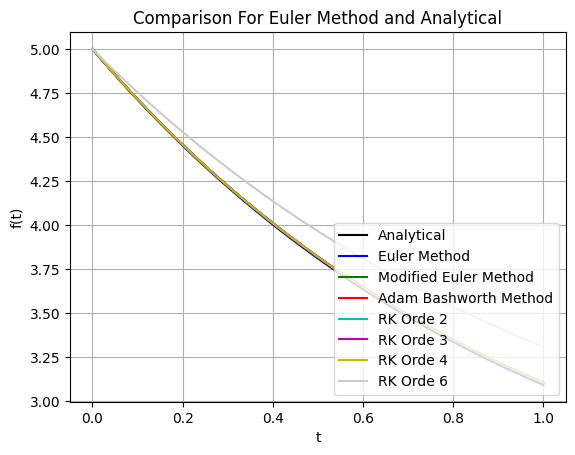

In [110]:
plt.plot(t, y_t, 'k', label='Analytical')
plt.plot(t, y_euler, 'b', label='Euler Method')
plt.plot(t, y_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, y_adamb, 'r', label='Adam Bashworth Method')
plt.plot(t, y_rko2, 'c', label='RK Orde 2')
plt.plot(t, y_rko3, 'm', label='RK Orde 3')
plt.plot(t, y_rko4, 'y', label='RK Orde 4')
plt.plot(t, y_rko6, '0.8', label='RK Orde 6')
plt.title('Comparison For Euler Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

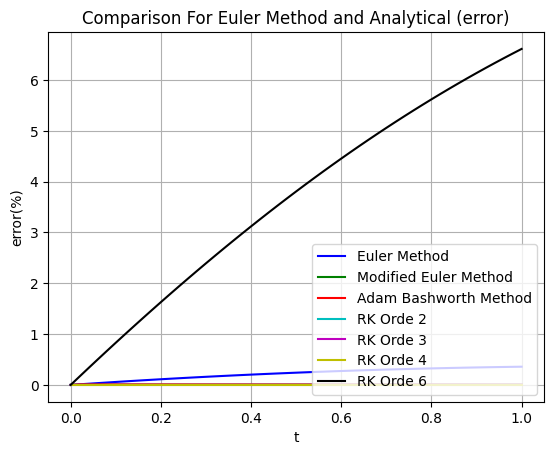

In [111]:
# plt.plot(t, e_t, 'k', label='Analytical')
plt.plot(t, e_euler, 'b', label='Euler Method')
plt.plot(t, e_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, e_adamb, 'r', label='Adam Bashworth Method')
plt.plot(t, e_rko2, 'c', label='RK Orde 2')
plt.plot(t, e_rko3, 'm', label='RK Orde 3')
plt.plot(t, e_rko4, 'y', label='RK Orde 4')
plt.plot(t, e_rko6, 'k', label='RK Orde 6')
plt.title('Comparison For Euler Method and Analytical (error)')
plt.xlabel('t')
plt.ylabel('error(%)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

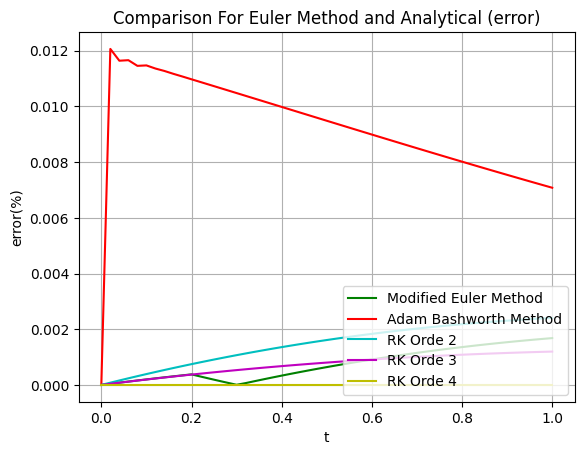

In [112]:
# plt.plot(t, e_euler, 'b', label='Euler Method')
plt.plot(t, e_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, e_adamb, 'r', label='Adam Bashworth Method')
plt.plot(t, e_rko2, 'c', label='RK Orde 2')
plt.plot(t, e_rko3, 'm', label='RK Orde 3')
plt.plot(t, e_rko4, 'y', label='RK Orde 4')
# plt.plot(t, e_rko6, 'k', label='RK Orde 6')
plt.title('Comparison For Euler Method and Analytical (error)')
plt.xlabel('t')
plt.ylabel('error(%)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

In [113]:
lst=[e_euler,e_modified_euler, e_adamb,e_rko2,e_rko3, e_rko4,e_rko6]
name_lst=['Euler', 'modified euler', 'Adam Bashworth', 'Runge Kutta Orde 2', 'Runge Kutta Orde 3', 'Runge Kutta Orde 4', 'Runge Kutta Orde 6']
delta_time_lst=[delta_time_euler, delta_time_modified_euler, delta_time_adamb, delta_time_rko2, delta_time_rko3, delta_time_rko4, delta_time_rko6]
delta_time_lst=[i.microseconds for i in delta_time_lst]
for i, lst_i in enumerate(lst):
  mean=np.mean(lst_i)
  median=np.median(lst_i)
  max=np.max(lst_i)
  print('{} method have \nmean: {}\nmedian: {}\nmax: {}\ntime to execute: {}\n'.format(name_lst[i], mean, median, max, delta_time_lst[i]))



Euler method have 
mean: 0.21932176094485345
median: 0.2408055585896808
max: 0.3585882790741312
time to execute: 586

modified euler method have 
mean: 0.0007386475153967634
median: 0.0006399456393990004
max: 0.0016809603305274284
time to execute: 1052

Adam Bashworth method have 
mean: 0.009260091936659937
median: 0.009385055292615782
max: 0.01206372506195872
time to execute: 3690

Runge Kutta Orde 2 method have 
mean: 0.0014692246415655443
median: 0.001611983198840056
max: 0.00240655881607969
time to execute: 636

Runge Kutta Orde 3 method have 
mean: 0.0007309278695219672
median: 0.0008019510728609399
max: 0.001197237054347412
time to execute: 685

Runge Kutta Orde 4 method have 
mean: 2.9432788873601497e-08
median: 3.229280368697513e-08
max: 4.8209698416806334e-08
time to execute: 796

Runge Kutta Orde 6 method have 
mean: 3.632590409045931
median: 3.807957628651034
max: 6.612786309896011
time to execute: 1214



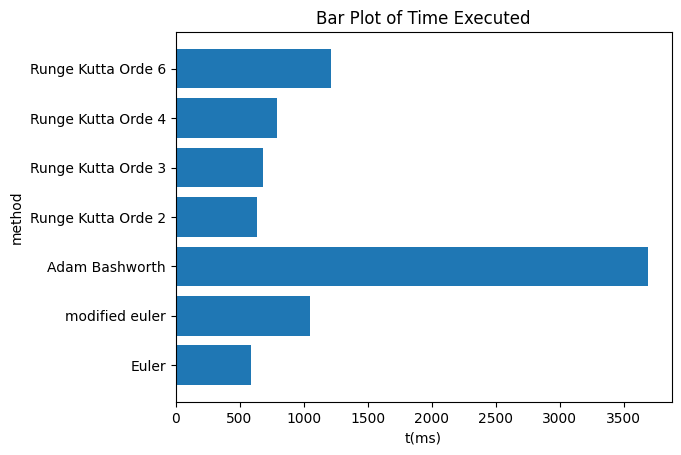

In [114]:
name_lst=['Euler', 'modified euler', 'Adam Bashworth', 'Runge Kutta Orde 2', 'Runge Kutta Orde 3', 'Runge Kutta Orde 4', 'Runge Kutta Orde 6']
delta_time_lst=[delta_time_euler, delta_time_modified_euler, delta_time_adamb, delta_time_rko2, delta_time_rko3, delta_time_rko4, delta_time_rko6]
delta_time_lst=[i.microseconds for i in delta_time_lst]

plt.barh(name_lst, delta_time_lst)

plt.title('Bar Plot of Time Executed')
plt.xlabel('t(ms)')
plt.ylabel('method')
# plt.grid()
# plt.legend(loc='lower right')
plt.show()


# Nomor 12 (Adam Bashworth Moulton)

## Bagian A

In [115]:
#defined variable
def adam_bashworth_moulton_ordinary_differential_equations_single_order_1(dt=0.1, pr=1, er=0.01, eps=1.0):
    start_time = time.monotonic()
    f=lambda t,y : 2-y
    f_t=lambda t :2+3*np.exp(-t)
    H = int((1-0)/dt)
    t=np.linspace(0, 1, H+1)
    y_t=np.zeros(len(t))
    y=np.zeros(len(t))
    e = np.zeros(len(t))
    ep=np.zeros(len(t))
    k = np.zeros(len(t))
    yp = np.zeros(len(t))
    dif=np.zeros(len(t))
    y[0]=5
    y_t[0]=5
    e[0]=(np.abs(y[0]-y_t[0])/y_t[0])*100
    #looping
    for j in range(len(t)-1):
        # calculate y true
        y_t[j+1]=f_t(t[j+1])
        #calculate y_pred
        ## j+1=1
        if j+1==1:
          yp[j+1]=y[j]+f(t[j], y[j])*dt #inisiasi yp
          ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100
          yk = [y[j]+f(t[j], yp[j+1])*dt] # inisiasi y korektor
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100 # inisiasi error untuk y kor pertama
          dif[j+1]=np.abs(yk[-1]-yp[j+1])
          while dif[j+1]>eps:
            yk.append(y[j]+f(t[j], yk[-1])*dt)
            e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100
            dif[j+1]=np.abs(yk[-1]-yk[-2])
          k[j+1]=len(yk)
          y[j+1]=yk[-1]

        ## j+1=2
        elif j+1==2:
          yp[j+1]=y[j]+(3/2*f(t[j], y[j])-1/2*f(t[j-1], y[j-1]))*dt #inisiasi yp
          ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100
          yk = [y[j]+(1/2*f(t[j], yp[j+1])+1/2*f(t[j], y[j]))*dt] # inisiasi y korektor
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100 # inisiasi error untuk y kor pertama
          dif[j+1]=np.abs(yk[-1]-yp[j+1])
          while dif[j+1]>eps:
            yk.append(y[j]+(1/2*f(t[j], yk[-1])+1/2*f(t[j], y[j]))*dt)
            e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100
            dif[j+1]=np.abs(yk[-1]-yk[-2])
          k[j+1]=len(yk)
          y[j+1]=yk[-1]

        ## j+1=3
        elif j+1==3:
          yp[j+1]=y[j]+(23/12*f(t[j], y[j])-16/12*f(t[j-1], y[j-1])\
                       +5/12*f(t[j-2], y[j-2]))*dt #inisiasi yp
          ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100
          yk = [y[j]+(5/12*f(t[j], yp[j+1])+8/12*f(t[j], y[j])\
                       -1/12*f(t[j-1], y[j-1]))*dt] # inisiasi y korektor
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100 # inisiasi error untuk y kor pertama
          dif[j+1]=np.abs(yk[-1]-yp[j+1])
          while dif[j+1]>eps:
            yk.append(y[j]+(5/12*f(t[j], yk[-1])+8/12*f(t[j], y[j])\
                       -1/12*f(t[j-1], y[j-1]))*dt)
            e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100
            dif[j+1]=np.abs(yk[-1]-yk[-2])
          k[j+1]=len(yk)
          y[j+1]=yk[-1]

        ## j+1=4
        elif j+1==4:
          #inisiasi yp
          yp[j+1]=y[j]+(55/24*f(t[j], y[j])-59/24*f(t[j-1], y[j-1])\
                       +37/24*f(t[j-2], y[j-2])-9/24*f(t[j-3], y[j-3]))*dt
          ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100
          #inisasi yk
          yk=[y[j]+(9/24*f(t[j], yp[j+1])+19/24*f(t[j], y[j])\
                       -5/24*f(t[j-1], y[j-1])+1/24*f(t[j-2], y[j-2]))*dt]
          #inisiasi e
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100
          #lakukan koreksi
          dif[j+1]=np.abs(yk[-1]-yp[j+1])
          while dif[j+1]>eps:
            yk.append(y[j]+(9/24*f(t[j], yk[-1])+19/24*f(t[j], y[j])\
                       -5/24*f(t[j-1], y[j-1])+1/24*f(t[j-2], y[j-2]))*dt)
            e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100
            dif[j+1]=np.abs(yk[-1]-yk[-2])
          #simpan nilai
          k[j+1]=len(yk)
          y[j+1]=yk[-1]

        ## j+1>= 5
        else:
          #inisiasi yp
          yp[j+1]=y[j]+(191/72*f(t[j], y[j])-281/72*f(t[j-1], y[j-1])\
                       +267/72*f(t[j-2], y[j-2])-131/72*f(t[j-3], y[j-3])+\
                       26/72*f(t[j-4], y[j-4]))*dt
          ep[j+1]=(np.abs(yp[j+1]-y_t[j+1])/y_t[j+1])*100
          #inisiasi yk
          yk = [y[j]+(26/72*f(t[j], yp[j+1])+61/72*f(t[j], y[j])\
                       -21/72*f(t[j-1], y[j-1])+7/72*f(t[j-2], y[j-2])-\
                       1/72*f(t[j-3], y[j-3]))*dt]
          #inisiasi e
          e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100
          #lakukan koreksi
          dif[j+1]=np.abs(yk[-1]-yp[j+1])
          while dif[j+1]>eps:
            yk.append(y[j]+(26/72*f(t[j], yk[-1])+61/72*f(t[j], y[j])\
                       -21/72*f(t[j-1], y[j-1])+7/72*f(t[j-2], y[j-2])-\
                       1/72*f(t[j-3], y[j-3]))*dt)
            e[j+1]=(np.abs(yk[-1]-y_t[j+1])/y_t[j+1])*100
            dif[j+1]=np.abs(yk[-1]-yk[-2])
          #simpan nilai
          k[j+1]=len(yk)
          y[j+1]=yk[-1]


    end_time = time.monotonic()
    delta_time=timedelta(seconds=end_time - start_time)
    if pr == 1:
      return t, y_t, y,e,ep,delta_time
    else:
      df = pd.DataFrame(list(zip(t,y_t, y, yp, e,ep,dif, k)),
                  columns =['t','y true','y pred', 'y_predictor',  'error(%)','error_predictor(%)','dif', 'k'])
      display(df)
      plt.plot(t, y, 'k', label='Euler Method')
      plt.plot(t, y_t, '0.7', label='Analytical')
      plt.title('Comparison For Euler Method and Analytical')
      plt.xlabel('t')
      plt.ylabel('f(t)')
      plt.grid()
      plt.legend(loc='lower right')
      plt.show()
      print("Waktu yang diperlukan untuk menjalankan program adalah {}".format(delta_time))


,t,y true,y pred,y_predictor,error(%),error_predictor(%),dif,k
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0
1,0.02,4.940596,4.941200,4.940000,0.012225,0.012064,1.200000e-03,1.0
2,0.04,4.882368,4.882958,4.882964,0.012085,0.012201,5.640000e-06,1.0
3,0.06,4.825294,4.825872,4.825877,0.011986,0.012090,5.015635e-06,1.0
4,0.08,4.769349,4.769916,4.769911,0.011887,0.011788,4.697547e-06,1.0
5,0.10,4.714512,4.715068,4.715072,0.011786,0.011882,4.538882e-06,1.0
6,0.12,4.660761,4.661306,4.661306,0.011686,0.011686,1.177522e-08,1.0
7,0.14,4.608075,4.608609,4.608609,0.011586,0.011586,2.612812e-09,1.0
8,0.16,4.556431,4.556955,4.556955,0.011485,0.011485,1.147739e-09,1.0
9,0.18,4.505811,4.506324,4.506324,0.011384,0.011384,3.103660e-10,1.0


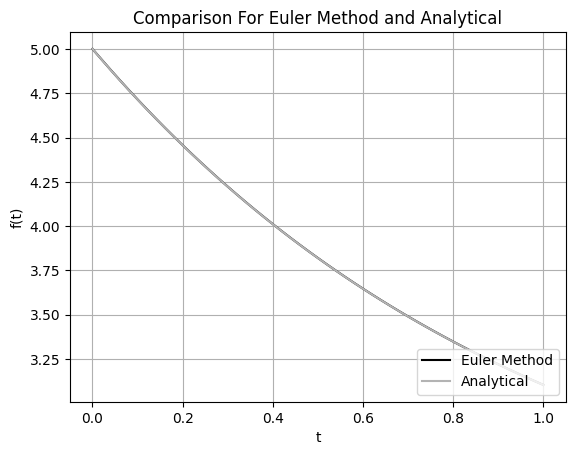

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001757


In [116]:
adam_bashworth_moulton_ordinary_differential_equations_single_order_1(dt=0.02, pr=2, er=0.01, eps=1.0)

,t,y true,y pred,y_predictor,error(%),error_predictor(%),dif,k
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0
1,0.02,4.940596,4.941176,4.940000,0.011749,0.012064,1.919993e-10,5.0
2,0.04,4.882368,4.882935,4.882941,0.011614,0.011733,5.882352e-10,3.0
3,0.06,4.825294,4.825849,4.825854,0.011519,0.011618,3.342349e-10,3.0
4,0.08,4.769349,4.769894,4.769889,0.011423,0.011329,2.540155e-10,3.0
5,0.10,4.714512,4.715046,4.715051,0.011327,0.011419,2.277050e-10,3.0
6,0.12,4.660761,4.661285,4.661285,0.011231,0.011231,1.089591e-10,2.0
7,0.14,4.608075,4.608588,4.608588,0.011135,0.011135,1.820730e-10,1.0
8,0.16,4.556431,4.556934,4.556934,0.011038,0.011038,9.392398e-11,1.0
9,0.18,4.505811,4.506304,4.506304,0.010941,0.010941,5.663292e-11,1.0


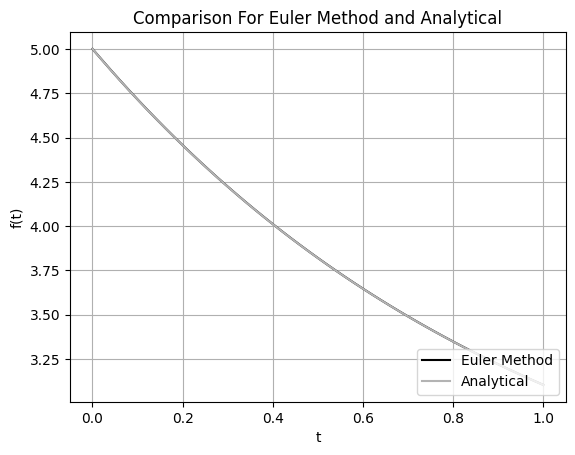

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001215


In [117]:
adam_bashworth_moulton_ordinary_differential_equations_single_order_1(dt=0.02, pr=2, er=0.01, eps=0.000000001)

,t,y true,y pred,y_predictor,error(%),error_predictor(%),dif,k
0,0.00,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0
1,0.02,4.940596,4.941176,4.940000,0.011749,0.012064,3.839595e-12,6.0
2,0.04,4.882368,4.882935,4.882941,0.011614,0.011733,5.882406e-12,4.0
3,0.06,4.825294,4.825849,4.825854,0.011519,0.011618,2.784439e-12,4.0
4,0.08,4.769349,4.769894,4.769889,0.011423,0.011329,1.905143e-12,4.0
5,0.10,4.714512,4.715046,4.715051,0.011327,0.011419,1.644906e-12,4.0
6,0.12,4.660761,4.661285,4.661285,0.011231,0.011231,7.869261e-13,3.0
7,0.14,4.608075,4.608588,4.608588,0.011135,0.011135,1.315392e-12,2.0
8,0.16,4.556431,4.556934,4.556934,0.011038,0.011038,6.794565e-13,2.0
9,0.18,4.505811,4.506304,4.506304,0.010941,0.010941,4.085621e-13,2.0


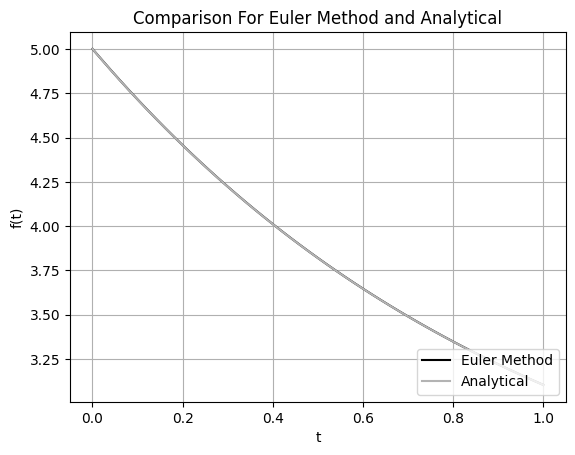

Waktu yang diperlukan untuk menjalankan program adalah 0:00:00.001779


In [118]:
adam_bashworth_moulton_ordinary_differential_equations_single_order_1(dt=0.02, pr=2, er=0.01, eps=0.00000000001)

## Bagian B

In [119]:
t,y_t,y_euler,e_euler,delta_time_euler=euler_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_, _,y_adamb,e_adamb,delta_time_adamb=adam_bashworth_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_, _, y_modified_euler, e_modified_euler,_,delta_time_modified_euler=modified_euler_ordinary_differential_equations_single_order_1(dt=0.02, eps=0.0005, pr=1)
_, _, y_rko2, e_rko2,delta_time_rko2=rk_o2_ordinary_differential_equations_single_order_1(dt=0.02,pr=1)
_, _, y_rko4, e_rko4,delta_time_rko4=rk_o4_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_,_,y_rko3,e_rko3,delta_time_rko3=rk_03_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_,_,y_rko6,e_rko6,delta_time_rko6=rk_o6_ordinary_differential_equations_single_order_1(dt=0.02, pr=1)
_, _, y_adambm,e_adambm,_,delta_time_adambm=adam_bashworth_moulton_ordinary_differential_equations_single_order_1(dt=0.02, pr=1, er=0.01, eps=0.0005)

In [120]:
df = pd.DataFrame(list(zip(t, y_t, y_euler, y_adamb, y_adambm,y_modified_euler,y_rko2,y_rko3, y_rko4,y_rko6,\
                               e_euler, e_adamb,e_adambm,e_modified_euler,e_rko2,e_rko3, e_rko4,e_rko6)),
                  columns =['t','y true', 'y euler', 'y adamb','y adambm','y modified euler','y rko2', 'y rko3', 'y rko4','y rko6'\
                              ,'e euler', 'e adamb','e adambm','e modified euler','e rko2', 'e rko3', 'e rko4','e rko6'])
display(df)

,t,y true,y euler,y adamb,y adambm,y modified euler,y rko2,y rko3,y rko4,y rko6,e euler,e adamb,e adambm,e modified euler,e rko2,e rko3,e rko4,e rko6
0,0.00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,0.02,4.940596,4.940000,4.940000,4.941176,4.940594,4.940600,4.940598,4.940596,4.948922,0.012064,0.012064,0.011739,0.000041,0.000081,0.000040,1.613863e-09,0.168519
2,0.04,4.882368,4.881200,4.881800,4.882935,4.882364,4.882376,4.882372,4.882368,4.898766,0.023929,0.011640,0.011603,0.000081,0.000160,0.000080,3.201531e-09,0.335863
3,0.06,4.825294,4.823576,4.824731,4.825849,4.825288,4.825305,4.825299,4.825294,4.849517,0.035596,0.011659,0.011508,0.000121,0.000238,0.000118,4.762887e-09,0.502006
4,0.08,4.769349,4.767104,4.768803,4.769893,4.769341,4.769364,4.769356,4.769349,4.801157,0.047062,0.011456,0.011413,0.000160,0.000314,0.000156,6.297765e-09,0.666923
5,0.10,4.714512,4.711762,4.713971,4.715046,4.714503,4.714531,4.714521,4.714512,4.753671,0.058328,0.011472,0.011316,0.000198,0.000390,0.000194,7.806078e-09,0.830590
6,0.12,4.660761,4.657527,4.660232,4.661284,4.660750,4.660783,4.660772,4.660761,4.707042,0.069391,0.011360,0.011220,0.000235,0.000464,0.000231,9.287704e-09,0.992983
7,0.14,4.608075,4.604377,4.607555,4.608587,4.608062,4.608099,4.608087,4.608075,4.661255,0.080253,0.011272,0.011124,0.000272,0.000536,0.000267,1.074254e-08,1.154078
8,0.16,4.556431,4.552289,4.555922,4.556934,4.556417,4.556459,4.556445,4.556431,4.616296,0.090911,0.011169,0.011027,0.000308,0.000608,0.000302,1.217048e-08,1.313852
9,0.18,4.505811,4.501243,4.505312,4.506303,4.505795,4.505841,4.505826,4.505811,4.572149,0.101366,0.011072,0.010930,0.000344,0.000677,0.000337,1.357145e-08,1.472282


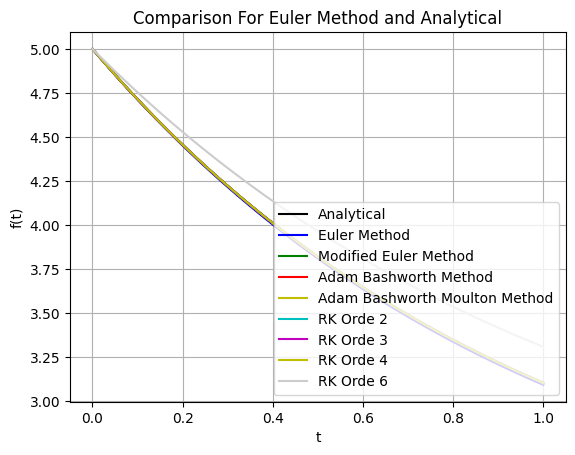

In [121]:
plt.plot(t, y_t, 'k', label='Analytical')
plt.plot(t, y_euler, 'b', label='Euler Method')
plt.plot(t, y_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, y_adamb, 'r', label='Adam Bashworth Method')
plt.plot(t, y_adambm, 'y', label='Adam Bashworth Moulton Method')
plt.plot(t, y_rko2, 'c', label='RK Orde 2')
plt.plot(t, y_rko3, 'm', label='RK Orde 3')
plt.plot(t, y_rko4, 'y', label='RK Orde 4')
plt.plot(t, y_rko6, '0.8', label='RK Orde 6')
plt.title('Comparison For Euler Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

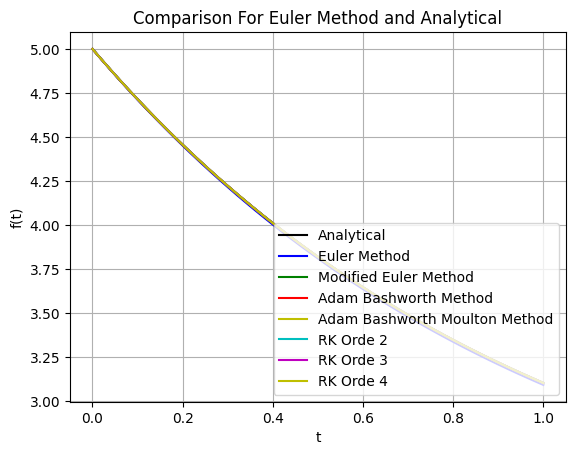

In [122]:
plt.plot(t, y_t, 'k', label='Analytical')
plt.plot(t, y_euler, 'b', label='Euler Method')
plt.plot(t, y_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, y_adamb, 'r', label='Adam Bashworth Method')
plt.plot(t, y_adambm, 'y', label='Adam Bashworth Moulton Method')
plt.plot(t, y_rko2, 'c', label='RK Orde 2')
plt.plot(t, y_rko3, 'm', label='RK Orde 3')
plt.plot(t, y_rko4, 'y', label='RK Orde 4')
# plt.plot(t, y_rko6, '0.8', label='RK Orde 6')
plt.title('Comparison For Euler Method and Analytical')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

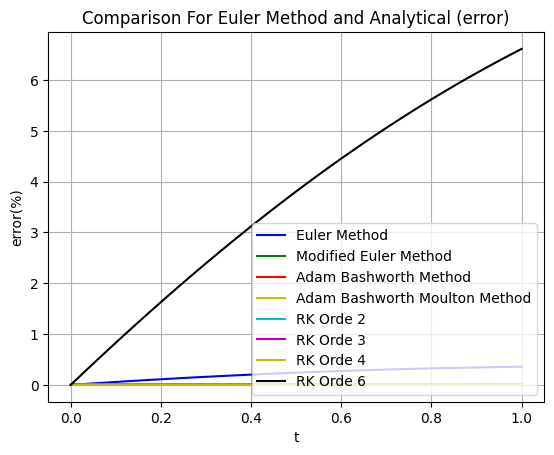

In [123]:
plt.plot(t, e_euler, 'b', label='Euler Method')
plt.plot(t, e_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, e_adamb, 'r', label='Adam Bashworth Method')
plt.plot(t, e_adambm, 'y', label='Adam Bashworth Moulton Method')
plt.plot(t, e_rko2, 'c', label='RK Orde 2')
plt.plot(t, e_rko3, 'm', label='RK Orde 3')
plt.plot(t, e_rko4, 'y', label='RK Orde 4')
plt.plot(t, e_rko6, 'k', label='RK Orde 6')
plt.title('Comparison For Euler Method and Analytical (error)')
plt.xlabel('t')
plt.ylabel('error(%)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

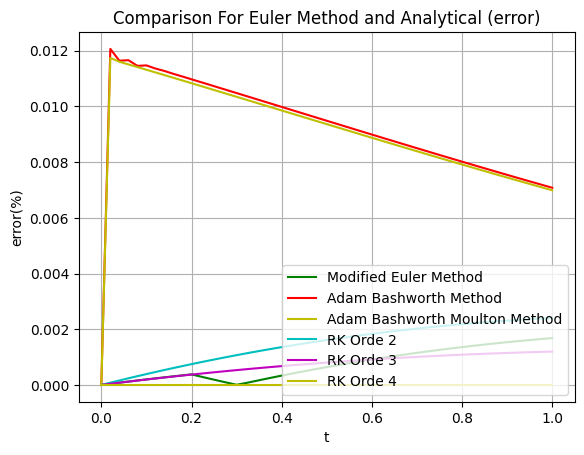

In [125]:
# plt.plot(t, e_euler, 'b', label='Euler Method')
plt.plot(t, e_modified_euler, 'g', label='Modified Euler Method')
plt.plot(t, e_adamb, 'r', label='Adam Bashworth Method')
plt.plot(t, e_adambm, 'y', label='Adam Bashworth Moulton Method')
plt.plot(t, e_rko2, 'c', label='RK Orde 2')
plt.plot(t, e_rko3, 'm', label='RK Orde 3')
plt.plot(t, e_rko4, 'y', label='RK Orde 4')
# plt.plot(t, e_rko6, 'k', label='RK Orde 6')
plt.title('Comparison For Euler Method and Analytical (error)')
plt.xlabel('t')
plt.ylabel('error(%)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
plt.show()

In [127]:
lst=[e_euler,e_modified_euler, e_adamb, e_adambm,e_rko2,e_rko3, e_rko4,e_rko6]
name_lst=['Euler', 'modified euler', 'Adam Bashworth','Adam Bashworth Moulton', 'Runge Kutta Orde 2', 'Runge Kutta Orde 3', 'Runge Kutta Orde 4', 'Runge Kutta Orde 6']
delta_time_lst=[delta_time_euler, delta_time_modified_euler, delta_time_adamb,delta_time_adambm, delta_time_rko2, delta_time_rko3, delta_time_rko4, delta_time_rko6]
delta_time_lst=[i.microseconds for i in delta_time_lst]
for i, lst_i in enumerate(lst):
  mean=np.mean(lst_i)
  median=np.median(lst_i)
  max=np.max(lst_i)
  print('{} method have \nmean: {}\nmedian: {}\nmax: {}\ntime to execute: {}\n'.format(name_lst[i], mean, median, max, delta_time_lst[i]))

Euler method have 
mean: 0.21932176094485345
median: 0.2408055585896808
max: 0.3585882790741312
time to execute: 517

modified euler method have 
mean: 0.0007386475153967634
median: 0.0006399456393990004
max: 0.0016809603305274284
time to execute: 1238

Adam Bashworth method have 
mean: 0.009260091936659937
median: 0.009385055292615782
max: 0.01206372506195872
time to execute: 747

Adam Bashworth Moulton method have 
mean: 0.009142156444223865
median: 0.009264763755185597
max: 0.011739071103880332
time to execute: 1594

Runge Kutta Orde 2 method have 
mean: 0.0014692246415655443
median: 0.001611983198840056
max: 0.00240655881607969
time to execute: 535

Runge Kutta Orde 3 method have 
mean: 0.0007309278695219672
median: 0.0008019510728609399
max: 0.001197237054347412
time to execute: 829

Runge Kutta Orde 4 method have 
mean: 2.9432788873601497e-08
median: 3.229280368697513e-08
max: 4.8209698416806334e-08
time to execute: 908

Runge Kutta Orde 6 method have 
mean: 3.632590409045931
med

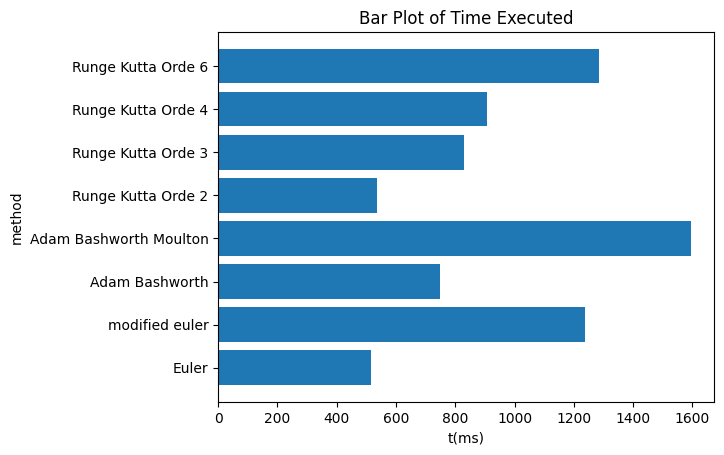

In [128]:
name_lst=['Euler', 'modified euler', 'Adam Bashworth','Adam Bashworth Moulton', 'Runge Kutta Orde 2', 'Runge Kutta Orde 3', 'Runge Kutta Orde 4', 'Runge Kutta Orde 6']
delta_time_lst=[delta_time_euler, delta_time_modified_euler, delta_time_adamb,delta_time_adambm, delta_time_rko2, delta_time_rko3, delta_time_rko4, delta_time_rko6]
delta_time_lst=[i.microseconds for i in delta_time_lst]

plt.barh(name_lst, delta_time_lst)

plt.title('Bar Plot of Time Executed')
plt.xlabel('t(ms)')
plt.ylabel('method')
# plt.grid()
# plt.legend(loc='lower right')
plt.show()